<a href="https://colab.research.google.com/github/mathrhino/tensorflow/blob/main/Keras_mnist_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##라이브러리 호출##

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt 
from tensorflow.keras import datasets
from tensorflow.keras.utils import to_categorical
%matplotlib inline 

###데이터 불러오기###

In [32]:
mnist = datasets.mnist

####데이터 셋 나누기####

In [33]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [34]:
train_x.shape

(60000, 28, 28)

In [35]:
image=train_x[0]
image.shape

(28, 28)

####데이터 시각화####

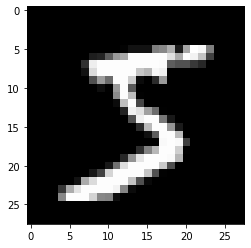

In [36]:
plt.imshow(image, 'gray')
plt.show()

##ONE HOT ENCODING##
###tensorflow.keras.utils import to_categorical###

In [37]:
to_categorical(1,5)

array([0., 1., 0., 0., 0.], dtype=float32)

In [38]:
label = train_y[0]
label

5

In [39]:
label_onehot = to_categorical(label, num_classes=10)
label_onehot

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


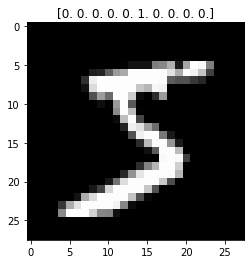

In [40]:
 plt.title(label_onehot)
 plt.imshow(train_x[0],'gray')
 plt.show()

####차원 늘리기####
np.expand_dims
tf.expand_dims
tf.newaxis
reshpae

In [56]:
#image= image[tf.newaxis, ..., tf.newaxis]
image = image. reshape([1,28,28,1])
image.shape

(1, 28, 28, 1)

##filters: layer output을 몇 개의 filter로 정할 건지##
##kernel_Size= filter 또는 weight의 크기##
##strides는 pixel을 이동할 때 얼만큼 이동 할 것인지##
##padding은 마지막 픽셀 주위에 0값을 채울 것인지? VALID, SAME##



In [57]:
layer=tf.keras.layers.Conv2D(filters=3,kernel_size=(3,3),strides=(1,1), padding='SAME',activation='relu')

##type 변경##

In [60]:
image= tf.cast(image, dtype=tf.float32)

In [61]:
output=layer(image)

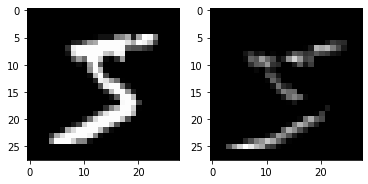

In [64]:
plt.subplot(1,2,1)
plt.imshow(image[0,:,:,0],'gray')
plt.subplot(1,2,2)
plt.imshow(output[0,:,:,0],'gray')
plt.show()

In [67]:
np.min(output),np.max(output)

(0.0, 362.1063)

In [74]:
weight=layer.get_weights()
weight[0].shape, weight[1].shape

((3, 3, 1, 3), (3,))

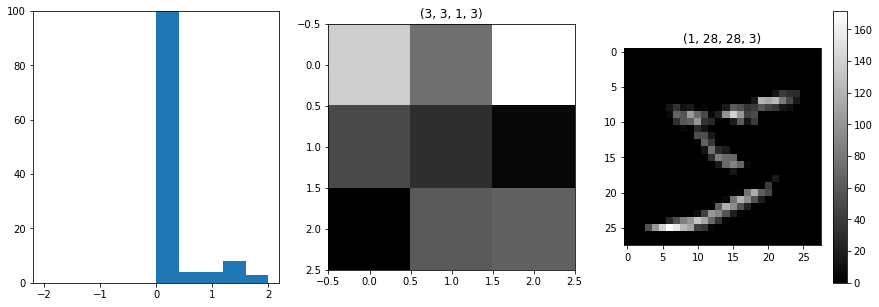

In [77]:
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.hist(output.numpy().ravel(),range=[-2,2])
plt.ylim(0,100)
plt.subplot(132)
plt.title(weight[0].shape)
plt.imshow(weight[0][:,:,0,0],'gray')
plt.subplot(133)
plt.title(output.shape)
plt.imshow(output[0,:,:,0],'gray')
plt.colorbar()
plt.show()

In [78]:
tf.keras.layers.ReLU()

In [79]:
act_layer = tf.keras.layers.ReLU()
act_output=act_layer(output)

In [81]:
output.shape

TensorShape([1, 28, 28, 3])

In [83]:
np.min(act_output), np.max(act_output)

(0.0, 362.1063)

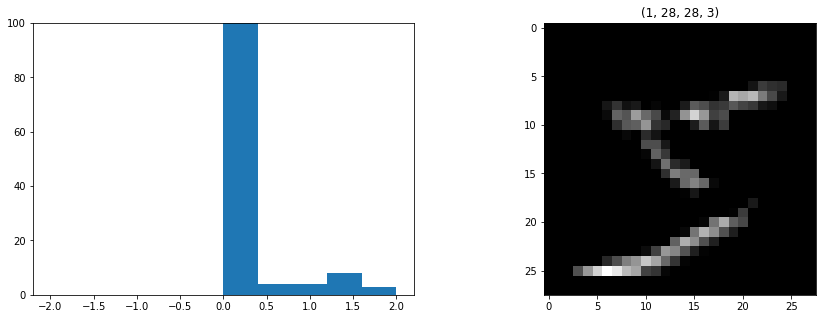

In [84]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.hist(act_output.numpy().ravel(), range=[-2,2])
plt.ylim(0, 100)

plt.subplot(122)
plt.title(act_output.shape)
plt.imshow(act_output[0,:,:,0],'gray')
plt.show()